In [1]:
import os

import google.oauth2.credentials

import google_auth_oauthlib.flow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import seaborn as sns


# The CLIENT_SECRETS_FILE variable specifies the name of a file that contains
# the OAuth 2.0 information for this application, including its client_id and
# client_secret.
CLIENT_SECRETS_FILE = "client_secret.json"

# This OAuth 2.0 access scope allows for full read/write access to the
# authenticated user's account and requires requests to use an SSL connection.
SCOPES = ['https://www.googleapis.com/auth/youtube.force-ssl']
API_SERVICE_NAME = 'youtube'
API_VERSION = 'v3'

def get_authenticated_service():
  flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
  credentials = flow.run_console()
  return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def print_response(response):
   print(response)
   #print(response, file=open("output.txt", "a"))
   #file = open(response, "a")
   #file.write(output)
   #file.close()


    # Build a resource based on a list of properties given as key-value pairs.
    # Leave properties with empty values out of the inserted resource.


def build_resource(properties):
    resource = {}
    for p in properties:
        # Given a key like "snippet.title", split into "snippet" and "title", where
        # "snippet" will be an object and "title" will be a property in that object.
        prop_array = p.split('.')
        ref = resource
        for pa in range(0, len(prop_array)):
            is_array = False
            key = prop_array[pa]

            # For properties that have array values, convert a name like
            # "snippet.tags[]" to snippet.tags, and set a flag to handle
            # the value as an array.
            if key[-2:] == '[]':
                key = key[0:len(key) - 2:]
                is_array = True

            if pa == (len(prop_array) - 1):
                # Leave properties without values out of inserted resource.
                if properties[p]:
                    if is_array:
                        ref[key] = properties[p].split(',')
                    else:
                        ref[key] = properties[p]
                elif key not in ref:
                    # For example, the property is "snippet.title", but the resource does
                    # not yet have a "snippet" object. Create the snippet object here.
                    # Setting "ref = ref[key]" means that in the next time through the
                    # "for pa in range ..." loop, we will be setting a property in the
                    # resource's "snippet" object.
                    ref[key] = {}
                    ref = ref[key]
                else:
                    # For example, the property is "snippet.description", and the resource
                    # already has a "snippet" object.
                    ref = ref[key]
            return resource

# Remove keyword arguments that are not set
def remove_empty_kwargs(**kwargs):
  good_kwargs = {}
  if kwargs is not None:
    for key, value in kwargs.items():
      if value:
        good_kwargs[key] = value
  return good_kwargs

def search_list_by_keyword(client, **kwargs):
  # See full sample for function
  kwargs = remove_empty_kwargs(**kwargs)
  df = pd.DataFrame()
  response = client.search().list(
    **kwargs
  ).execute()

  json_string = json.dumps(response)
  json_data = json.loads(json_string)
  global next_token
  next_token = json_data['nextPageToken']
  print(json_data['items'])
  for i in json_data['items']:
      video_list.append(i['id']['videoId'])

  #print(video_list)



def videos_list_multiple_ids(client, **kwargs):
  # See full sample for function
  kwargs = remove_empty_kwargs(**kwargs)

  response = client.videos().list(
    **kwargs
  ).execute()

  json_string = json.dumps(response)
  json_data = json.loads(json_string)
  df_items = pd.DataFrame()
   
  df = pd.DataFrame.from_dict(json_normalize(json_data['items']), orient='columns')
  df.to_csv('mars50.csv')



if __name__ == '__main__':
    # When running locally, disable OAuthlib's HTTPs verification. When
    # running in production *do not* leave this option enabled.
    os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'
    client = get_authenticated_service()

video_list = []

search_list_by_keyword(client,
                           part='snippet',
                           maxResults=50,
                           q='mars',
                           type='video')

video_string = ','.join(video_list)
#print(video_string)
videos_list_multiple_ids(client,
                         part='snippet,contentDetails,statistics',
                         id=video_string)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=405132311255-j3q4bglklqg6mn7j7jufjkpv92ss2k33.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=9cTz16EUFeqcFhshD76sQi0eTqrBa3&prompt=consent&access_type=offline
Enter the authorization code: 4/qgDBxPJWP2bXNSmD9AYp8jWzzp3XZ7d4kYl-aKh7Bd-Q1jOGVLMTDAA
[{'kind': 'youtube#searchResult', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/3xSOWiFzS2ZLyCTq1-s9oTnIm0g"', 'id': {'kind': 'youtube#video', 'videoId': 'w8jK5XVJWX0'}, 'snippet': {'publishedAt': '2018-11-30T20:00:05.000Z', 'channelId': 'UCrMePiHCWG4Vwqv3t7W9EFg', 'title': "InSight Landed on Mars! What's Next? | SciShow News", 'description': 'InSight has safely landed on Mars, and astronomers have some improved theories about the TRAPPIST-1 system. Hosted by: Caitlin Hofmeister SciShow has a ...', 'thumbnails': {'default': {'url'

In [90]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy 

# Reading in and cleaning up some of the data by deleting useless columns

df = pd.read_csv('youtube750.csv')
print(df.columns)
df.head(5)
print(df.shape)
df = df.drop(columns=['contentDetails.dimension', 'contentDetails.projection','etag', 'id',
                     'kind','snippet.channelId', 'snippet.thumbnails.default.height',
                     'snippet.thumbnails.default.url', 'snippet.thumbnails.default.width',
                     'snippet.thumbnails.high.height', 'snippet.thumbnails.high.url',
                     'snippet.thumbnails.high.width', 'snippet.thumbnails.maxres.height',
                     'snippet.thumbnails.maxres.url', 'snippet.thumbnails.maxres.width',
                     'snippet.thumbnails.medium.height', 'snippet.thumbnails.medium.url',
                     'snippet.thumbnails.medium.width', 'snippet.thumbnails.standard.height',
                     'snippet.thumbnails.standard.url', 'snippet.thumbnails.standard.width',
                     'statistics.favoriteCount'
                     ])
#Use reg ex to convert 'contentDetails.duration' from "PT11M28S" to 11 min, 28 sec
digits_re = r'\d+'
#df['list_min'] = [ for df['contentDetails.duration'] in df]))

#print(int(re.findall(r'\d+', df['contentDetails.duration'][0])[0]) *60 + int(re.findall(r'\d+', df['contentDetails.duration'][0])[1]))


# df['duration_sec'] = [int(re.findall(r'\d+', row)[0]) *60 + int(re.findall(r'\d+', row)[1])
#                       for row in df['contentDetails.duration']] 

df=df.rename(columns = {'statistics.dislikeCount':'dislikeCount'})
df=df.rename(columns = {'statistics.commentCount':'commentCount'})
df=df.rename(columns = {'statistics.likeCount':'likeCount'})
df=df.rename(columns = {'statistics.viewCount':'viewCount'})

print(df.shape)
print(df.columns)
print(df.head(5))


Index(['Unnamed: 0', 'search_word', 'contentDetails.caption',
       'contentDetails.definition', 'contentDetails.dimension',
       'contentDetails.duration', 'contentDetails.licensedContent',
       'contentDetails.projection', 'etag', 'id', 'kind', 'snippet.categoryId',
       'snippet.channelId', 'snippet.channelTitle',
       'snippet.defaultAudioLanguage', 'snippet.defaultLanguage',
       'snippet.description', 'snippet.liveBroadcastContent',
       'snippet.localized.description', 'snippet.localized.title',
       'snippet.publishedAt', 'snippet.tags',
       'snippet.thumbnails.default.height', 'snippet.thumbnails.default.url',
       'snippet.thumbnails.default.width', 'snippet.thumbnails.high.height',
       'snippet.thumbnails.high.url', 'snippet.thumbnails.high.width',
       'snippet.thumbnails.maxres.height', 'snippet.thumbnails.maxres.url',
       'snippet.thumbnails.maxres.width', 'snippet.thumbnails.medium.height',
       'snippet.thumbnails.medium.url', 'snippet.thum

In [128]:
# Analyze and address Null values 

df.info()
#fill NAN with empty string / list  

df['snippet.tags'].fillna('[]', inplace=True)
df['snippet.description'].fillna("", inplace=True)
df['snippet.localized.description'].fillna("", inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 23 columns):
Unnamed: 0                        750 non-null int64
search_word                       750 non-null object
contentDetails.caption            750 non-null bool
contentDetails.definition         750 non-null object
contentDetails.duration           750 non-null object
contentDetails.licensedContent    750 non-null bool
snippet.categoryId                750 non-null int64
snippet.channelTitle              750 non-null object
snippet.defaultAudioLanguage      440 non-null object
snippet.defaultLanguage           184 non-null object
snippet.description               750 non-null object
snippet.liveBroadcastContent      750 non-null object
snippet.localized.description     750 non-null object
snippet.localized.title           750 non-null object
snippet.publishedAt               750 non-null object
snippet.tags                      750 non-null object
snippet.title                     750

In [129]:
# add column for snippet.tags length 
import ast
df['snippet.tags.length'] = [len(ast.literal_eval(row)) for row in df['snippet.tags']]

#df['snippet.tags.length'] = [len(list(row)) for row in df['snippet.tags']]

#df['snippet.tags.list'] = [len(row) for row in df['snippet.tags']]

#ast.literal_eval(df['snippet.tags.list']))
#print(len(df['snippet.tags'].values[0]))

#df['snippet.tags.list'].values[1]
#df['snippet.tags.length'].values[1]  
#need to convert string to list using...

SyntaxError: unexpected EOF while parsing (<unknown>, line 0)

In [92]:
import numbers

someData = [[1.0,4,'7',-50],['8 bananas','text','',12.5644]]

s = df['contentDetails.duration']

s = ['PT6H5M53S', 'PT24M9S', 'PT78S']

for item in s:

    r = re.search(r'(\d*)H(\d*)M(\d*)S|(\d*)M(\d*)S|(\d*)M|(\d*)S', item, re.I)
    resp = r.groups()
    print(resp)
    resp = [int(item) if item else 0 for item in resp]
    print(resp)
    #resp = list(r.groups())

   # print(resp)
    


('6', '5', '53', None, None, None, None)
[6, 5, 53, 0, 0, 0, 0]
(None, None, None, '24', '9', None, None)
[0, 0, 0, 24, 9, 0, 0]
(None, None, None, None, None, None, '78')
[0, 0, 0, 0, 0, 0, 78]


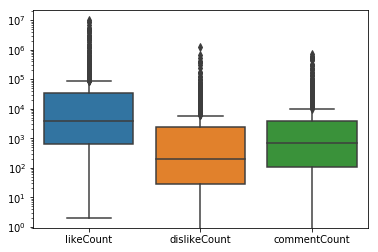

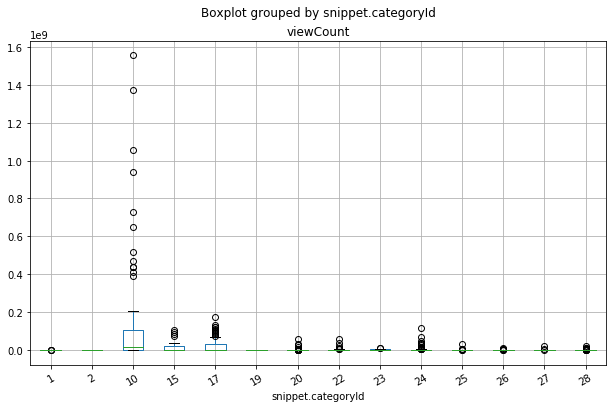

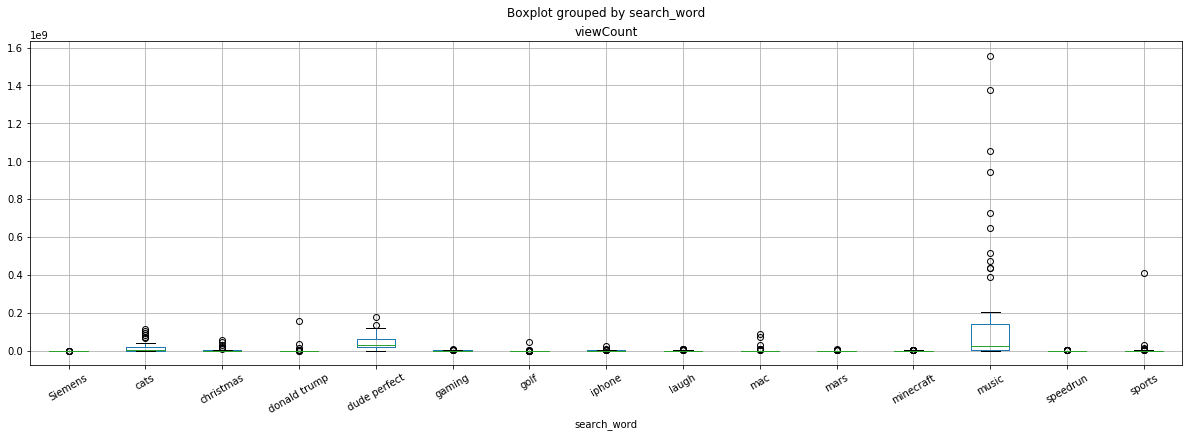

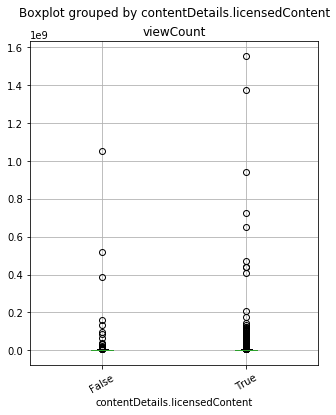

In [66]:
#Univariate Analysis - boxplot and histogram
stats_df = df[['likeCount', 'dislikeCount', 'commentCount']].copy()
ax = sns.boxplot(data=stats_df)
ax.set(yscale="log")

df.boxplot('viewCount','snippet.categoryId',rot = 30,figsize=(10,6))
df.boxplot('viewCount','search_word',rot = 30,figsize=(20,6))
df.boxplot('viewCount','contentDetails.licensedContent',rot = 30,figsize=(5,6))




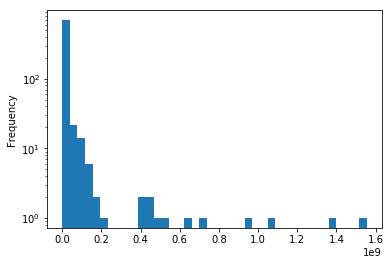

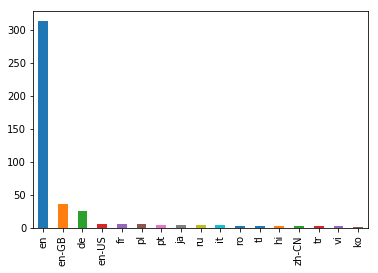

In [18]:
# Distribution of view counts.  Most frequency appears in under 200,000 views
df['viewCount'].plot.hist(bins =40)
plt.yscale('log')
plt.xscale('linear')
plt.show()


plt.show()

# Language bar graph
df['snippet.defaultAudioLanguage'].value_counts().plot(kind='bar')
df['snippet.defaultLanguage'].value_counts().plot(kind='bar')



In [30]:
# Consider chisquare test on categorical data

from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

   contentDetails.licensedContent  viewCount
0                           False   25705976
1                            True   18702684
    index   search_word  viewCount
12     12         music  199006956
4       4  dude perfect   47181495
1       1          cats   17762626
14     14        sports    9791546
9       9           mac    4949982
2       2     christmas    4799437
3       3  donald trump    4599641
7       7        iphone    1600801
5       5        gaming    1361913
8       8         laugh    1350724
6       6          golf    1106786
11     11     minecraft     919435
10     10          mars     643909
13     13      speedrun     466793
0       0       Siemens     125326
    index  snippet.categoryId  viewCount
2       2                  10  158380911
4       4                  17   22432593
3       3                  15   18282277
9       9                  24    5064312
7       7                  22    4247114
12     12                  27    1926368
8       8         

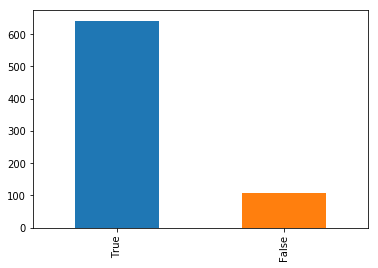

In [26]:
# Analysis of average view count based on licensed content and also search_word

df['contentDetails.licensedContent'].value_counts().plot(kind='bar')

pd.set_option('display.float_format', lambda x: '%i' % x)
print(df.groupby('contentDetails.licensedContent', as_index=False)['viewCount'].mean())
#print(df.sort_values(['viewCount'], ascending=False).groupby('search_word', as_index=False)['viewCount'].mean())
grouped_search = df.groupby('search_word', as_index=False)['viewCount'].mean().reset_index()
print(grouped_search.sort_values('viewCount', ascending=False))

grouped_id = df.groupby('snippet.categoryId', as_index=False)['viewCount'].mean().reset_index()
print(grouped_id.sort_values('viewCount', ascending=False))


# licensed content appears to have fewer average view counts
# most categoryID views - music, Sports, Pets and Animals


w


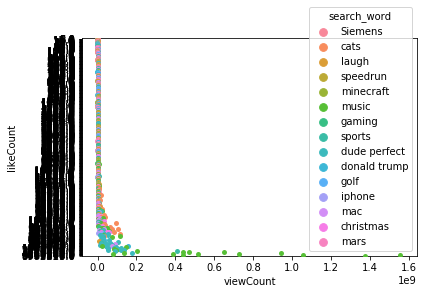

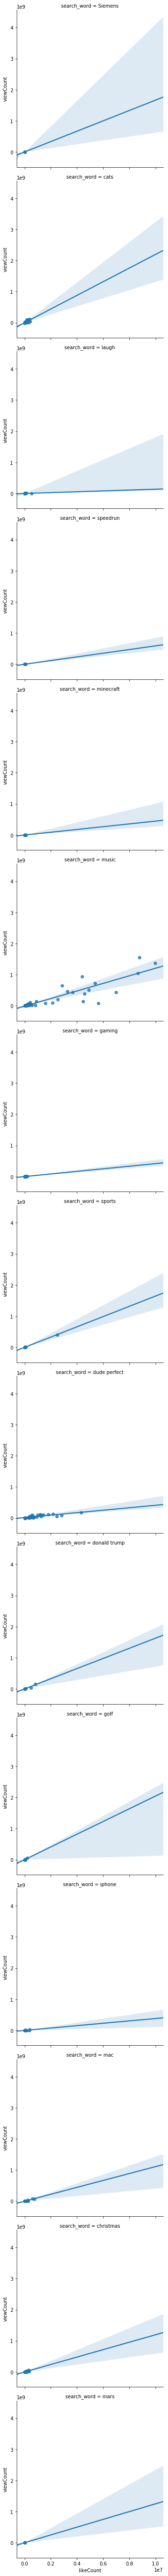

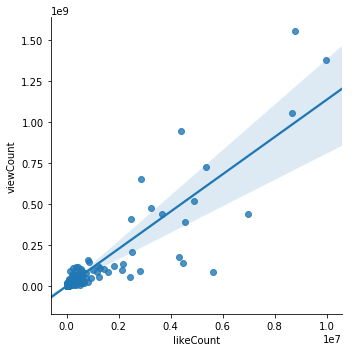

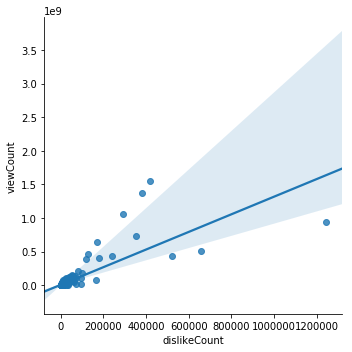

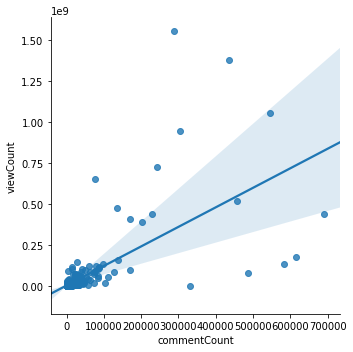

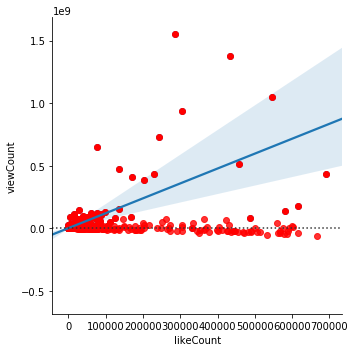

In [20]:
# Bi-variate Analysis


#sns.lmplot(x='statistics.likeCount', y='statistics.viewCount', data=df, hue='search_word', palette='Set1')

print(max('viewCount'))

sns.swarmplot(x='viewCount',y='likeCount', data=df, hue='search_word', orient='h')

      
sns.lmplot(x='likeCount', y='viewCount', data=df, row='search_word')


sns.lmplot(x='likeCount', y='viewCount', data=df)
sns.lmplot(x='dislikeCount', y='viewCount', data=df)
sns.lmplot(x='commentCount', y='viewCount', data=df)

sns.lmplot(x='commentCount', y='viewCount', data=df)
#Like count is the best indicator apparently

sns.residplot(x='likeCount', y='viewCount', data=df, color='red')

plt.scatter(df['commentCount'], df['viewCount'], label='data', color='red', marker='o')

#df.boxplot(column = ['statistics.likeCount', 'statistics.dislikeCount', 'statistics.commentCount'])

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time

# help functions to see how long the fitting of a model took
def timer(f):
    start = time.time()
    res = f()
    end = time.time()
    print("fitting time: {}".format(end - start))
    return res

#build our models , training test split, builds model w/ LR, uses timer, returns test features, test target vector, model
def build_model_for_data(data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2)
    pipeline = make_pipeline(LinearRegression())
    model = timer(lambda: pipeline.fit(X_train, y_train))
    return (X_test, y_test, model)

boston = load_boston()
print(type(boston))

print()
print()
print('Example original value distribution of features: ')
for x in boston['data'][0]:
    print(x)

#normalization algorithm,  transform boston data and print it
min_max = MinMaxScaler()
print(type(min_max))
boston_min_max = min_max.fit_transform(boston['data'])
print()
print("Value distribution after min max: ")
for x in boston_min_max[0]:
    print(x)
    
# Try the standard scaler algorithm for comparison
std = StandardScaler()
boston_std = std.fit_transform(boston['data'])
print()
print("Value distribution after std: ")
for x in boston_std[0]:
    print(x)
    
# Model evaluation 
print()
print("Without")
X_test, y_test, model = build_model_for_data(boston['data'], boston['target'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print()
print("MinMax algorithm for normalization:")
X_test, y_test, model = build_model_for_data(boston_min_max, boston['target'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print()
print("Std. algorithm for normalization:")
X_test, y_test, model = build_model_for_data(boston_std, boston['target'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))

<class 'sklearn.utils.Bunch'>


Example original value distribution of features: 
0.00632
18.0
2.31
0.0
0.538
6.575
65.2
4.09
1.0
296.0
15.3
396.9
4.98
<class 'sklearn.preprocessing.data.MinMaxScaler'>

Value distribution after min max: 
0.0
0.18
0.06781524926686218
0.0
0.31481481481481477
0.5775052692086607
0.6416065911431514
0.26920313906646415
0.0
0.20801526717557245
0.2872340425531916
0.9999999999999999
0.08967991169977926

Value distribution after std: 
-0.417713352331339
0.2848298609673567
-1.2879094989577484
-0.2725985670699254
-0.14421743255530006
0.4136718893017465
-0.1200134161980508
0.1402136034929299
-0.9828428567665046
-0.6666082090210975
-1.4590003802772087
0.44105193260704206
-1.075562304567866

Without
fitting time: 0.06000018119812012
MSE: 22.176975053590734

MinMax algorithm for normalization:
fitting time: 0.04800009727478027
MSE: 22.176975053590784

Std. algorithm for normalization:
fitting time: 0.007999897003173828
MSE: 22.176975053590766
